[![logo](https://climate.copernicus.eu/sites/default/files/custom-uploads/branding/LogoLine_horizon_C3S.png)](https://climate.copernicus.eu)

# Exploring global Land Cover available through the Climate Data store (CDS)

**This notebook can be run on free online platforms, such as Binder, Kaggle and Colab, or they can be accessed from GitHub. The links to run this notebook in these environments are provided here, but please note they are not supported by ECMWF.**

[![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/c3s-training-submodule-sat-obs-land/main?labpath=fire-radiative-power-and-active-fire.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-land/blob/main/fire-radiative-power-and-active-fire.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/c3s-training-submodule-sat-obs-land/blob/main/fire-radiative-power-and-active-fire.ipynb)
[![github](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/ecmwf-training/c3s-training-submodule-sat-obs-land/blob/main/fire-radiative-power-and-active-fire.ipynb)

## Table of contents
- [1. Learning objectives](##1.-Learning-objectives)
- [2. Introduction](##2.-Introduction)
- [3. Data](##3.-Data)
- [4. Prepare your environment](##4.-Prepare-your-environment)
- [5. Select and download data](##5.-Select-and-download-data)
- [6. Visualise the C3S & CCI Land Cover dataset](##6.-Visualise-the-C3S-&-CCI-Land-Cover-dataset)
- [7. Use case I - Explore C3S & CCI Land Cover over time](##7.-Use-case-I---Explore-C3S-&-CCI-Land-Cover-over-time)
- [8. Use case II - Examine regional statistics of C3S & CCI Land Cover information](##8.-Use-case-II---Examine-regional-statistics-of-C3S-&-CCI-Land-Cover-information)
- [9. Conclusion](##9.-Conclusion)

## 1. Learning objectives

📌 **Note**: At the end of this notebook, the user will be able to:

- Use WeKEO to explore Land cover products available through the C3S;
- Retrieve landcover data from the C3S Climate Data Store, examining, subsetting, saving and re-projecting it using Python code;
- Explore landcover change over time.
- Explore landcover regional statistics


## 2. Introduction

Land Cover (LC) and land cover change (LCC) are becoming increasingly related to the climate modelling effort. Land cover change is a pressing environmental issue acting as both a cause and a consequence of climate change. The importance of these issues requires continuous monitoring systems and the most accurate data. The Copernicus Climate Change Service provides Intermediate Climate Data Records for many Essential Climate Variables, including LC. The global C3S LC maps 2016 – 2022 are/will be consistent with the existing European Space Agency Climate Change Initiative global annual LC maps from 1992 – 2015.

Land cover is the observed bio-physical cover on the Earth’s surface (Townshend et al., 2008). It is not to be confounded with land use. Land use characterizes the arrangements, socio-economic activities and inputs people are undertaking on a certain land cover type.

The proposed land cover ontology assumes that the land cover is organized along a continuum of temporal and spatial scales and that each land cover type is defined by a characteristic scale, i.e. by the typical spatial extent and period over which its physical traits are observed (Miller, 1994). This twofold assumption requires introducing the time dimension in the land cover characterization to allow distinguishing between the stable and the dynamic components of the land surface.

The stable component, named “land cover”, refers to the set of land surface features which remain stable over time and thus define the land cover independently of any sources of temporary or natural variability. Conversely, the dynamic component is directly related to this temporary or natural variability that can induce some variation in land surface features over time but without changing the land cover in its essence. This dynamic component is referred to as “land surface seasonality” (Lamarche et al., 2014).


### Land cover change

In this context, ‘LC change’ (LCC) is therefore considered as a permanent modification of the LC – and not of its conditions – in comparison with a baseline status.


### Land cover classes


A LC class refers to a LC category described by a stable ensemble of land surface features forming a LC class (e.g., forest, cropland). Land surface features consist of landscape elementary units (e.g., a house, a tree, a water body, etc.) described by: 

1. the type of the observed features, such as tree, shrub, herbaceous vegetation, moss/lichen vegetation, terrestrial or aquatic vegetation, inland water, built-up areas, permanent snow/ice, etc; 
1. the structure of the observed features, like the vegetation height, vegetation cover, building density, etc; 
1. the nature of the observed features, such as the level of artificiality or some species information (e.g., C3/C4 distinction); 
1. the homogeneity of the observed features at the level of observation, leading to pure or mosaic classes. 
The LC classes are well-defined and described using the UN/FAO Land Cover Classification System (LCCS) (di Gregorio and Jansen, 2005).


![logo](./img/overview_LC.png)

**Figure 2-1: Land Cover Map including the legend**

This dataset provides global maps describing the land surface into 22 classes, which have been defined using the United Nations Food and Agriculture Organization’s (UN FAO) Land Cover Classification System (LCCS). In addition to the land cover (LC) maps, four quality flags are produced to document the reliability of the classification and change detection.

In order to ensure continuity, these land cover maps are consistent with the series of global annual LC maps from the 1990s to 2015 produced by the European Space Agency (ESA) Climate Change Initiative (CCI), which are also available on the ESA CCI LC viewer.

To produce this dataset, the entire Medium Resolution Imaging Spectrometer (MERIS) Full and Reduced Resolution archive from 2003 to 2012 was first classified into a unique 10-year baseline LC map. This is then back- and up-dated using change detected from (i) Advanced Very-High-Resolution Radiometer (AVHRR) time series from 1992 to 1999, (ii) SPOT-Vegetation (SPOT-VGT) time series from 1998 to 2012 and (iii) PROBA-Vegetation (PROBA-V) from 2014 to 2019, SENTINEL-3 Ocean/Land Colour (S3-OLCI) Instrument and SENTINEL-3 Sea and Land Surface Temperature Radiometer (S3-SLSTR) time series from 1992 to 2022.

Beyond the climate-modelling communities, this dataset’s long-term consistency, yearly updates, and high thematic detail on a global scale have made it attractive for a multitude of applications such as land accounting, forest monitoring and desertification, in addition to scientific research.

**References:**
- Townshend J. R., Latham J., Arino O., Balstad R., Belward A., Conant R., Elvidge C., Feuquay J., El Hadani D., Herold M., Janetos A., Justice C.O., Liu J., Loveland T., Nachtergaele F., Ojima,D., Maiden M., Palazzo F., Schmullius C., Sessa R., Singh A., Tschirley J. and Yahamoto H., 2008, Integrated Global Observations of the Land: an IGOS-P theme. IGOL Report No. 8, GTOS, 54. Available at: http://www.fao.org/docrep/011/i0536e/i0536e00.htm
- Miller R.I., 1994, Mapping the diversity of the nature, London, New York: Chapman & Hall
- Lamarche, C., Bontemps, S., Rousseau, C., De Maet, T., Verhegghen, A., Radoux, J., Van Bogaert, E., Arino, O. and Defourny, P., 2014. " CCI-LC seasonality product. Characterizing the reference dynamics of the land surface. In The 4th International Symposium on Recent Advances in Quantitative Remote Sensing: RAQRS'IV.
- Di Gregorio, A. and Louisa J M Jansen (2005). Land Cover Classification. System Classification concepts and user manual. V2.0. (R. Food & Agriculture Organization of the United Nations, Ed.) https://www.fao.org/3/y7220e/y7220e00.htm.


## 3. Data

The data used in the examples are the satellite-based Land Cover products that provide global maps describing the land surface into 22 classes defined using the United Nations Food and Agriculture Organization’s (UN FAO) Land Cover Classification System (LCCS).

For documentation and other information on Land Cover available through the CDS, please visit the CDS [Land cover](https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-land-cover?tab=overview) page.


## 4. Prepare your environment

### Setup the CDSAPI and your credentials

The code below will ensure that the `cdsapi` package is installed. If you have not setup your `~/.cdsapirc` file with your credenials, you can replace `None` with your credentials that can be found on the [how to api](https://cds.climate.copernicus.eu/how-to-api) page (you will need to log in to see your credentials).

In [1]:
!pip install -q cdsapi
# If you have already setup your .cdsapirc file you can leave this as None
cdsapi_key = None
cdsapi_url = None


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Install and import libraries/modules

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
|**rasterio**|[Rasterio](https://rasterio.readthedocs.io/en/stable/) is a library that allows operations on gridded raster data such as satellite images or terrain models.|
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operation on geometric data.|
|**pandas**|[Pandas](https://geopandas.org/en/stable/) is a library that allows data analysis and manipulation.|
|**odc-geo**|[odc-geo](https://odc-geo.readthedocs.io/en/latest/) is a library that allows combination of geometry shape classes from shapely with CRS from pyproj.|
|**xhistogram**|[xhistogram](https://xhistogram.readthedocs.io/en/latest/index.html) is a library for fast, flexible, label-aware histograms for numpy and xarray.|

In [2]:
# Modules system
import os

# Modules related to data retrieving
import earthkit as ek
import cdsapi

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import cartopy.crs as ccrs
import pandas as pd
import geopandas as gpd


Below we define a directory to store the files locally, and create this directory if it does not already exist

In [3]:
LOCAL_DATA_DIR = "./data_dir"
os.makedirs(LOCAL_DATA_DIR, exist_ok=True)

## 5. Select and download data

### Presentation of the products used

From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

The [C3S Land Cover dataset](https://cds.climate.copernicus.eu/datasets/satellite-land-cover?tab=overview) provides global maps describing the land surface into 22 classes, which have been defined using the United Nations Food and Agriculture Organization’s (UN FAO) Land Cover Classification System (LCCS). In addition to the land cover (LC) maps, four quality flags are produced to document the reliability of the classification and change detection.

You can also visit the Copernicus Climate Data Store pages dedicated to the products ([Land cover](https://cds.climate.copernicus.eu/datasets/satellite-land-cover?tab=overview)) to see more detail about the product and all the different variables that are available.


**Table 5-1: Data description**


|   DATA  |                                                                             DESCRIPTION                                                                             |
| :---: |:-------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|**Data type** |                                                                               Gridded                                                                               |
|**Projection** |                                                                            	Plate Carrée                                                                            |
|**Horizontal coverage** |                                                                               Global                                                                                |
|**Horizontal resolution** |                                                                                300 m                                                                                |
|**Vertical coverage** |                                                                               Surface                                                                               |
|**Vertical resolution** |                                                                            Single level                                                                             |
|**Temporal coverage** |                                                                 1992 to present with one year delay                                                                 |
|**Temporal resolution** |                                                                               Yearly                                                                                |
|**File format**	|                                                                               NetCDF4                                                                               |
|**Conventions**	|                                      Climate and Forecast (CF) Metadata Convention v1.6 and ESA CCI Data Standards [DSWG 2015]                                      |
|**Versions**	| Version 2.0.7cds provides the LC maps for the years 1992 – 2015; version 2.1.1 for the years after 2016. Both versions are produced with the same processing chain. |
|**Update frequency**	|                                                                               Yearly                                                                                |


**Table 5-2: Main variables**


| |MAIN VARIABLES||
| :---: | :---:|  :---:|
|**Name** |	Units | Description |
|**Change count** |	Dimensionless | Number of years where land cover class changes have occurred, since 1992. 0 for stable, greater than 0 for changes. |
|**Current pixel state** |	Dimensionless | Pixel identification from satellite surface reflectance observations, mainly distinguishing between land, water, and snow/ice. Six values are used: 1, 2, 3, 4, 5, 6; respectively meaning: clear land, clear water, clear snow ice, cloud, cloud shadow, filled. |
|**Land cover class** |	Dimensionless | Land cover class per pixel, according to a legend of 22 classes, defined using the Land Cover Classification System developed by the United Nations Food and Agriculture Organization. Distinct values are encoded as unsigned byte (0..255). The complete legend is available in the NetCDF files metadata and in the Product User Guide documentation. |
|**Observation count** |	Dimensionless | Number of valid satellite observations that have contributed to each pixel's classification |
|**Processed flag** |	Dimensionless | Flag to mark areas that could not be classified. Two values are used: 0, 1; respectively meaning: not_processed, processed. |


### Retrieving the data

There are different ways to download data in [ECMWF Climate Data Store](https://cds.climate.copernicus.eu). You can do it manually from the [Data Download TAB](https://cds.climate.copernicus.eu/datasets/satellite-land-cover?tab=download), or you can also download the data using the CDS-API. We write the API request, i.e. specify which product we want, which parameters, etc. To write a new request, the easiest way is to select your data parameters in the [CDS](https://cds.climate.copernicus.eu/datasets/satellite-land-cover?tab=download), click on Show API request, and copy/paste it in a file (or directly in a notebook cell).

:::{warning}

Please remember to accept the terms and conditions of the dataset, at the bottom of the CDS download form.

:::


First we will connect our cdsapi client:


In [4]:
c = cdsapi.Client(url=cdsapi_url, key=cdsapi_key)

2025-08-01 11:31:21,659 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


In [5]:
# Define a download filename:
download_filename_2022 = f"{LOCAL_DATA_DIR}/lc_2022.zip"

# Downloading ba-pixel product over Europe
dataset = "satellite-land-cover"
request = {
    "variable": "all",
    "year": ["2022"],
    "version": ["v2_1_1"]
}

if not os.path.exists(download_filename_2022):
    c.retrieve(dataset, request, download_filename_2022)
else:
    print(f"File {download_filename_2022} already exists. Skipping download.")

lc_data = ek.data.from_source("file", download_filename_2022)
lc_data

File ./data_dir/lc_2022.zip already exists. Skipping download.


NetCDFFieldListReader(C:\Users\Grit\AppData\Local\Temp\tmpa26xiebs\file-4aa84042af72499a4af0efdd994f56f751f5e11e628c09f66195837343b22184.d\C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.nc)

## 6. Visualise the C3S & CCI Land Cover dataset

Let's take a first quick look at the dataset! Let's plot for example the year 2022 for the regiom Kerala - a southern Indian state known for its backwaters, tropical beaches, tea plantations, and rich culture!

**Application main steps:**
- Definition of the color map based on the LCCS Legend
- Define a subset based on the latitude and longitude values
- Compose a title
- Show the result on a map using the chosen title
- Save the subset and the image


In [6]:
# Definition of the color map based on the LCCS Legend

cmap = mcolors.ListedColormap([
        (0, 0, 0),                 # 0
        (1, 1, 0.392156),           # 10
        (1, 1, 0.392156),           # 11
        (1, 1, 0),                  # 12
        (0.666666, 0.941176, 0.941176),    # 20
        (0.862745, 0.941176, 0.392156),    # 30
        (0.784313, 0.784313, 0.392156),    # 40
        (0, 0.392156, 0),           # 50
        (0, 0.62745, 0),            # 60
        (0, 0.62745, 0),            # 61
        (0.666666, 0.784313, 0),    # 62
        (0, 0.235294, 0),           # 70
        (0, 0.235294, 0),           # 71
        (0, 0.313725, 0),           # 72
        (0.156862, 0.313725, 0),    # 80
        (0.156862, 0.313725, 0),    # 81
        (0.156862, 0.392156, 0),    # 82
        (0.470588, 0.509803, 0),    # 90
        (0.549019, 0.62745, 0),     # 100
        (0.745098, 0.588235, 0),    # 110
        (0.588235, 0.392156, 0),    # 120
        (0.588235, 0.392156, 0),    # 121
        (0.588235, 0.392156, 0),    # 122
        (1, 0.705882, 0.196078),    # 130
        (1, 0.862745, 0.823529),    # 140
        (1, 0.921568, 0.686274),    # 150
        (1, 0.784313, 0.392156),    # 151
        (1, 0.823529, 0.470588),    # 152
        (1, 0.921568, 0.686274),    # 153
        (0, 0.470588, 0.352941),    # 160
        (0, 0.588235, 0.470588),    # 170
        (0, 0.862745, 0.509803),    # 180
        (0.764705, 0.078431, 0),    # 190
        (1, 0.960784, 0.843137),    # 200
        (0.862745, 0.862745, 0.862745),    # 201
        (1, 0.960784, 0.843137),    # 202
        (0, 0.274509, 0.784313),   # 210
        (1, 1, 1)    # 220
])

bounds = [
        0, 10, 11, 12, 20, 30, 40, 50, 60, 61, 62, 70, 71, 72, 80,
        81, 82, 90, 100, 110, 120, 121, 122, 130, 140, 150, 151,
        152, 153, 160, 170, 180, 190, 200, 201, 202, 210, 220, 230]
    
    
norm = mcolors.BoundaryNorm(bounds, cmap.N)    


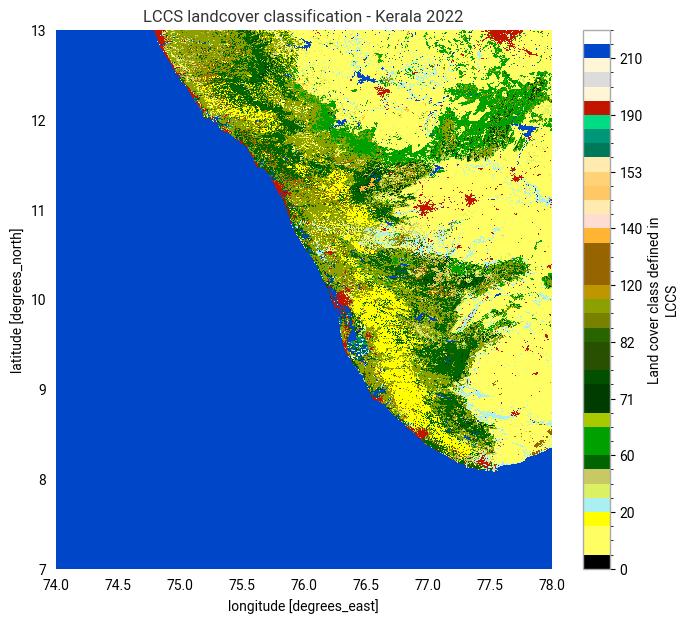

In [7]:
# Spatial subset selection 
min_lon = 74
min_lat = 13
max_lon = 78
max_lat = 7

data=lc_data.to_xarray()
data_subset = data.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
data_lc_2D=data_subset['lccs_class']

# Set plot title		
time_str= str(data_lc_2D.coords['time'].values[0]).split('-')[0]
title = 'LCCS landcover classification - Kerala ' + time_str

# Create the figure
fig=data_lc_2D[0].plot(cmap=cmap, norm=norm)
plt.title(title)
#show figure
plt.show()


![image](./img/Legend_LCCS.png)

**Figure 6-1: Land Cover Map 2022 including the legend for the region Kerala**

In [8]:
# show the complete dataset
data

<xarray.Dataset> Size: 101GB
Dimensions:              (time: 1, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 518kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 8B 2022-01-01
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (time, lat, lon) uint8 8GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 34GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 34GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 17GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    change_count         (time, lat, lon) uint8 8GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    crs                  int32 4B ...
    lat_bounds           (lat, bounds) float64 1MB dask.array<chunksize=(64800, 2), meta=np.ndarray>
    lon_bounds           (lon, bounds) float64 2MB dask.array<chunksize=(129600, 2), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/38)
    title:                      Land Cover Map of 2022
    summary:                    This dataset characterizes the land cover of ...
    type:                       C3S-LC-L4-LCCS-Map-300m-P1Y
    references:                 https://cds.climate.copernicus.eu/
    institution:                UCLouvain
    contact:                    copernicus-support@ecmwf.int
    ...                         ...
    geospatial_lon_resolution:  0.002778
    id:                         C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1
    project:                    EC C3S Land Cover
    source:                     Sentinel-3 OLCI
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0

In [9]:
# show the subset of the dataset
data_lc_2D

<xarray.DataArray 'lccs_class' (time: 1, lat: 2160, lon: 1440)> Size: 3MB
dask.array<getitem, shape=(1, 2160, 1440), dtype=uint8, chunksize=(1, 1530, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 17kB 13.0 13.0 12.99 12.99 ... 7.01 7.007 7.004 7.001
  * lon      (lon) float64 12kB 74.0 74.0 74.01 74.01 ... 77.99 77.99 78.0 78.0
  * time     (time) datetime64[ns] 8B 2022-01-01
Attributes:
    standard_name:        land_cover_lccs
    flag_colors:          #ffff64 #ffff64 #ffff00 #aaf0f0 #dcf064 #c8c864 #00...
    long_name:            Land cover class defined in LCCS
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    flag_values:          [  0  10  11  12  20  30  40  50  60  61  62  70  7...

**Write dataset contents to a netCDF file.**

In [10]:
data_subset.to_netcdf(
    os.path.join(LOCAL_DATA_DIR, "lc_2022_kerala.nc")
)

### Re-project the data into another projection

Let's visualise the year 2022 for the Kerala region once again, but in a different projection!

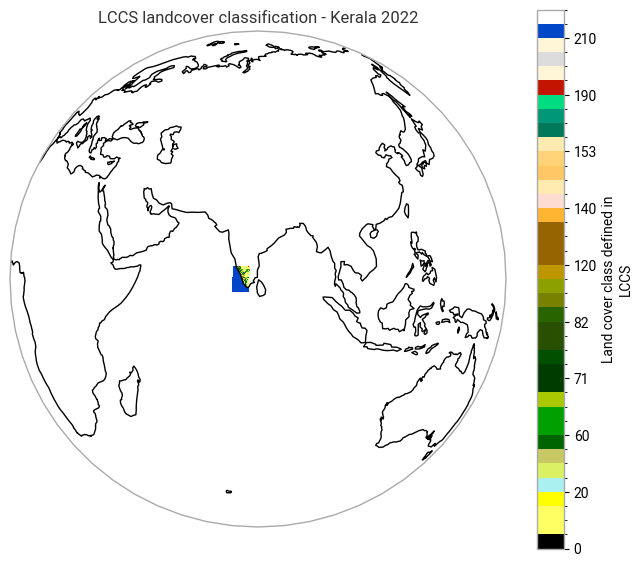

In [11]:
ax = plt.axes(projection=ccrs.Orthographic(80, 10))
ax.set_global()
data_lc_2D[0].plot(ax=ax, transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )
ax.coastlines()
plt.title(title)
plt.show()

![image](./img/Legend_LCCS.png)

**Figure 6-2: Land Cover Map 2022 including the legend for the region Kerala - orthographic projection**

## 7. Use case I - Explore C3S & CCI Land Cover over time

**Application main steps:**
- Definition of the time period and download the data
- Define a subset based on the latitude and longitude values
- Show the results and save the image
- Define a point based on the latitude and longitude values
- Show the time series and save the image

In [12]:
# Define a download filename:
download_filename_multiyear = f"{LOCAL_DATA_DIR}/lc_2016-2022_subset.zip"

# Downloading ba-pixel product over Europe
dataset = "satellite-land-cover"
request = {
    "variable": "all",
    "year": [
        "2016", "2018", "2020",
        "2022"
    ],
    "version": ["v2_1_1"],
    "area": [15, 70, 5, 80],
}

if not os.path.exists(download_filename_multiyear):
    c.retrieve(dataset, request, download_filename_multiyear)
else:
    print(f"File {download_filename_multiyear} already exists. Skipping download.")

lc_data_multiple_years = ek.data.from_source("file", download_filename_multiyear)
lc_data_multiple_years

File ./data_dir/lc_2016-2022_subset.zip already exists. Skipping download.


NetCDFMultiFieldList(NetCDFFieldListReader(C:\Users\Grit\AppData\Local\Temp\tmpa26xiebs\file-f7c11ff2e180d3f59ef9991cf77f131fa7c33fb433d75c6095dfa52168ad1e79.d\C3S-LC-L4-LCCS-Map-300m-P1Y-2016-v2.1.1.area-subset.15.80.5.70.nc),NetCDFFieldListReader(C:\Users\Grit\AppData\Local\Temp\tmpa26xiebs\file-f7c11ff2e180d3f59ef9991cf77f131fa7c33fb433d75c6095dfa52168ad1e79.d\C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1.area-subset.15.80.5.70.nc),NetCDFFieldListReader(C:\Users\Grit\AppData\Local\Temp\tmpa26xiebs\file-f7c11ff2e180d3f59ef9991cf77f131fa7c33fb433d75c6095dfa52168ad1e79.d\C3S-LC-L4-LCCS-Map-300m-P1Y-2020-v2.1.1.area-subset.15.80.5.70.nc),NetCDFFieldListReader(C:\Users\Grit\AppData\Local\Temp\tmpa26xiebs\file-f7c11ff2e180d3f59ef9991cf77f131fa7c33fb433d75c6095dfa52168ad1e79.d\C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1.area-subset.15.80.5.70.nc))

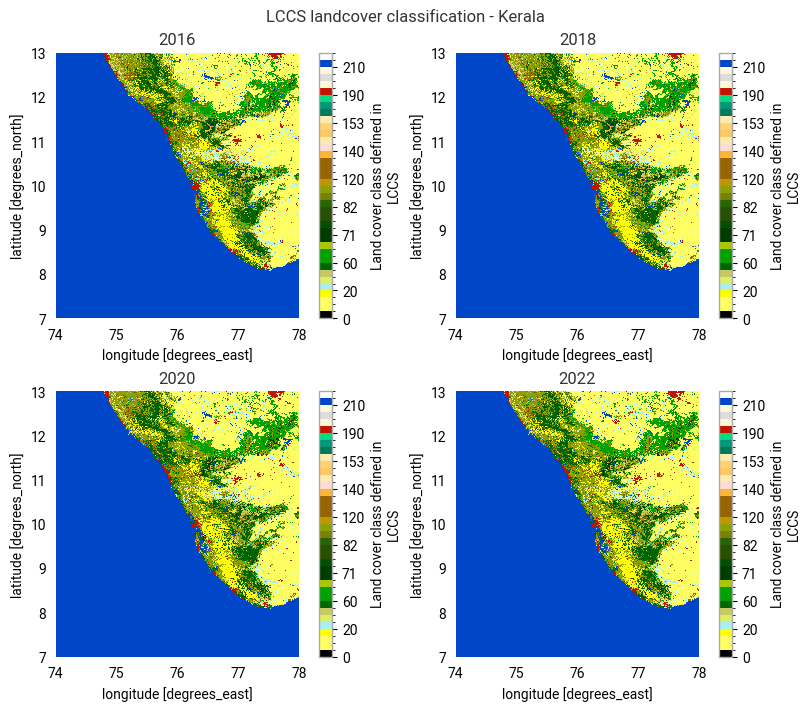

In [13]:
# Spatial subset selection 
min_lon = 74
min_lat = 13
max_lon = 78
max_lat = 7

data_multiyear=lc_data_multiple_years.to_xarray()
data_subset = data_multiyear.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))
data_lc_2D=data_subset['lccs_class']

# Set plot title	

time_str_0= str(data_lc_2D.coords['time'].values[0]).split('-')[0]
time_str_1= str(data_lc_2D.coords['time'].values[1]).split('-')[0]
time_str_2= str(data_lc_2D.coords['time'].values[2]).split('-')[0]
time_str_3= str(data_lc_2D.coords['time'].values[3]).split('-')[0]
title = 'LCCS landcover classification - Kerala'

# Create the figure
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, constrained_layout = True)
fig.suptitle(title)
# fig.tight_layout()
# fig.subplots_adjust(top=0.88)
data_lc_2D[0].plot(cmap=cmap, norm=norm, ax=ax0)
ax0.set_title(time_str_0)
data_lc_2D[1].plot(cmap=cmap, norm=norm, ax=ax1)
ax1.set_title(time_str_1)
data_lc_2D[2].plot(cmap=cmap, norm=norm, ax=ax2)
ax2.set_title(time_str_2)
data_lc_2D[3].plot(cmap=cmap, norm=norm, ax=ax3)
ax3.set_title(time_str_3)

#show figure
plt.show()


![image](./img/Legend_LCCS.png)

**Figure 7-1: Land Cover Map 2016, 2018, 2020 & 2022 including the legend for the region Kerala**

In [14]:
# show the dataset
data

<xarray.Dataset> Size: 101GB
Dimensions:              (time: 1, lat: 64800, lon: 129600, bounds: 2)
Coordinates:
  * lat                  (lat) float64 518kB 90.0 90.0 89.99 ... -90.0 -90.0
  * lon                  (lon) float64 1MB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time                 (time) datetime64[ns] 8B 2022-01-01
Dimensions without coordinates: bounds
Data variables:
    lccs_class           (time, lat, lon) uint8 8GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    processed_flag       (time, lat, lon) float32 34GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    current_pixel_state  (time, lat, lon) float32 34GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    observation_count    (time, lat, lon) uint16 17GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    change_count         (time, lat, lon) uint8 8GB dask.array<chunksize=(1, 2025, 2025), meta=np.ndarray>
    crs                  int32 4B ...
    lat_bounds           (lat, bounds) float64 1MB dask.array<chunksize=(64800, 2), meta=np.ndarray>
    lon_bounds           (lon, bounds) float64 2MB dask.array<chunksize=(129600, 2), meta=np.ndarray>
    time_bounds          (time, bounds) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes: (12/38)
    title:                      Land Cover Map of 2022
    summary:                    This dataset characterizes the land cover of ...
    type:                       C3S-LC-L4-LCCS-Map-300m-P1Y
    references:                 https://cds.climate.copernicus.eu/
    institution:                UCLouvain
    contact:                    copernicus-support@ecmwf.int
    ...                         ...
    geospatial_lon_resolution:  0.002778
    id:                         C3S-LC-L4-LCCS-Map-300m-P1Y-2022-v2.1.1
    project:                    EC C3S Land Cover
    source:                     Sentinel-3 OLCI
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0

In [15]:
# show the subset of the dataset
data_lc_2D

<xarray.DataArray 'lccs_class' (time: 4, lat: 2160, lon: 1440)> Size: 12MB
dask.array<getitem, shape=(4, 2160, 1440), dtype=uint8, chunksize=(1, 2160, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 17kB 13.0 13.0 12.99 12.99 ... 7.01 7.007 7.004 7.001
  * lon      (lon) float64 12kB 74.0 74.0 74.01 74.01 ... 77.99 77.99 78.0 78.0
  * time     (time) datetime64[ns] 32B 2016-01-01 2018-01-01 ... 2022-01-01
Attributes:
    standard_name:        land_cover_lccs
    flag_colors:          #ffff64 #ffff64 #ffff00 #aaf0f0 #dcf064 #c8c864 #00...
    long_name:            Land cover class defined in LCCS
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    flag_values:          [  0  10  11  12  20  30  40  50  60  61  62  70  7...

<class 'range'>


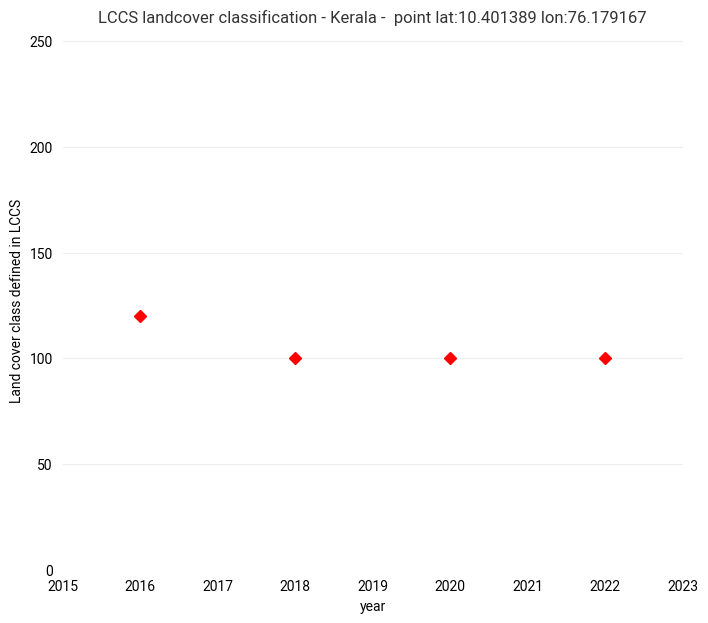

In [16]:
# Point selection
lon = 76.179167
lat = 10.401389

data_subset = data_multiyear.sel(lat=lat, lon=lon, method='nearest')
data_lc_timeseries=data_subset['lccs_class']

time=np.ones(4, dtype=int)
values=np.ones(4, dtype=int)
print(range)
for i in range(4):
    time[i]= int(str(data_lc_timeseries.coords['time'].values[i]).split('-')[0])
    values[i]= data_lc_timeseries.values[i]
title = 'LCCS landcover classification - Kerala'

# Create the figure
fig, ax = plt.subplots()
ax.plot(time, values,  marker="D", linestyle='None', color ='red')
ax.set_xlim(2015, 2023)
ax.set_ylim(0, 255)
ax.set_title(title + ' - ' + ' point lat:' + str(lat) + ' lon:' + str(lon))
ax.set_ylabel("Land cover class defined in LCCS")
ax.set_xlabel("year")
#show figure
plt.show()


**Figure 7-2: Land Cover Class on a selected location in Kerala for the years 2016, 2018, 2020 & 2022**

**The time series of the C3S and CCI land cover maps (CLC) at this location shows a change in the lccs class.**

## 8. Use case II - Examine regional statistics of C3S & CCI Land Cover information

**Application main steps:**

- Select a region based on the shape file
- Show the results and save the image
- Calculate the regional statistics and show/ save the results

Here we are using the LC 2022 map data and country borders provided by [Nomenclature of territorial units for statistics](https://ec.europa.eu/eurostat/web/gisco/geodata/administrative-units/countries) (NUTS).

First we will download and open the NUTS with earthkit.data, the output from the cell below shows the first 10 rows of the geopandas representation of the NUTS shapes.

In [17]:
# Access the GISCO NUTS 2024 dataset with earthkit
nuts_2024 = ek.data.from_source(
    "url", "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_60M_2024_4326_LEVL_0.geojson"
)
nuts_gpd = nuts_2024.to_geopandas()
# Set the index to the NUTS_ID column
nuts_gpd.set_index("NUTS_ID", inplace=True)
nuts_gpd[:10]

,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,geometry
NUTS_ID,,,,,,,,
EL,0,EL,Elláda,Ελλάδα,NaN,None,None,"MULTIPOLYGON (((28.13811 36.32213, 27.83164 35..."
ES,0,ES,España,España,NaN,None,None,"MULTIPOLYGON (((4.31657 39.87646, 4.20006 39.8..."
FI,0,FI,Suomi/Finland,Suomi/Finland,NaN,None,None,"MULTIPOLYGON (((28.92956 69.05191, 28.49493 68..."
FR,0,FR,France,France,NaN,None,None,"MULTIPOLYGON (((55.86434 -21.24704, 55.49022 -..."
HR,0,HR,Hrvatska,Hrvatska,NaN,None,None,"MULTIPOLYGON (((16.5968 46.4759, 16.85475 46.3..."
HU,0,HU,Magyarország,Magyarország,NaN,None,None,"POLYGON ((21.38824 48.5496, 22.12108 48.37831,..."
IE,0,IE,Éire/Ireland,Éire/Ireland,NaN,None,None,"POLYGON ((-8.04432 54.36347, -7.42482 54.1433,..."
IS,0,IS,Ísland,Ísland,NaN,None,None,"MULTIPOLYGON (((-15.04445 66.15393, -13.86672 ..."
AL,0,AL,Shqipëria,Shqipëria,NaN,None,None,"POLYGON ((20.0763 42.55582, 20.36436 42.3066, ..."


We can now use earthkit.transforms to mask the data, we choose to only mask the `"lccs_class"` variable and set the `mask_dim` to the `"NUTS_ID"` column of the geopandas above. The output in the cell below shows our masked data array, there is a new dimension, `NUTS_ID` which corresponds to each of the countries in the NUTS dataset.

In [18]:
country = "Finland"
nuts_id = "FI"
nuts_gpd_subset = nuts_gpd.loc[[nuts_id]]
min_lon, min_lat, max_lon, max_lat = nuts_gpd_subset.bounds.values[0]

global_lccs_data = lc_data.to_xarray()["lccs_class"]
# subset to bounds of our gpd
subset_lccs_data = global_lccs_data.sel(
    lat=slice(max_lat, min_lat), lon=slice(min_lon, max_lon)
)
# subset_lccs_data
# mask the data
data_lccs_masked = ek.transforms.aggregate.spatial.mask(
    subset_lccs_data, nuts_gpd_subset, mask_dim="NUTS_ID", all_touched=True
)
data_lccs_masked


<xarray.DataArray 'lccs_class' (NUTS_ID: 1, time: 1, lat: 3672, lon: 4298)> Size: 63MB
dask.array<broadcast_to, shape=(1, 1, 3672, 4298), dtype=float32, chunksize=(1, 1, 2025, 2025), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 29kB 70.05 70.05 70.05 70.04 ... 59.86 59.86 59.85
  * lon      (lon) float64 34kB 19.52 19.53 19.53 19.53 ... 31.45 31.46 31.46
  * time     (time) datetime64[ns] 8B 2022-01-01
  * NUTS_ID  (NUTS_ID) object 8B 'FI'
Attributes:
    standard_name:        land_cover_lccs
    flag_colors:          #ffff64 #ffff64 #ffff00 #aaf0f0 #dcf064 #c8c864 #00...
    long_name:            Land cover class defined in LCCS
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    flag_values:          [  0  10  11  12  20  30  40  50  60  61  62  70  7...

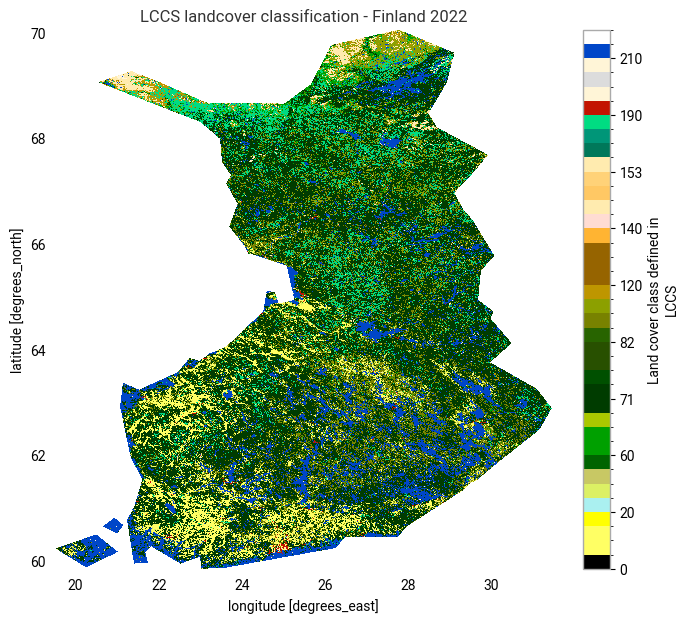

In [19]:
# Show and save the image with applied mask
# Set plot title
country = 'Finland'
nuts_id = 'FI'
time_str= str(data_lccs_masked.coords['time'].values[0]).split('-')[0]
title = f'LCCS landcover classification - {country} {time_str}'

data_lccs_region = data_lccs_masked.isel(time=0)
# Create the figure
data_lccs_region.plot(cmap=cmap, norm=norm)
plt.title(title)
# Show figure
plt.show()

![image](./img/Legend_LCCS.png)


**Figure 8-1: Land Cover 2022 including the legend for the Finland**

In [20]:
# area of the polygon
area_polygon = nuts_gpd_subset.area.head()
area_polygon

C:\Users\Grit\AppData\Local\Temp\ipykernel_42708\2147410973.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_polygon = nuts_gpd_subset.area.head()


NUTS_ID
FI    63.850359
dtype: float64

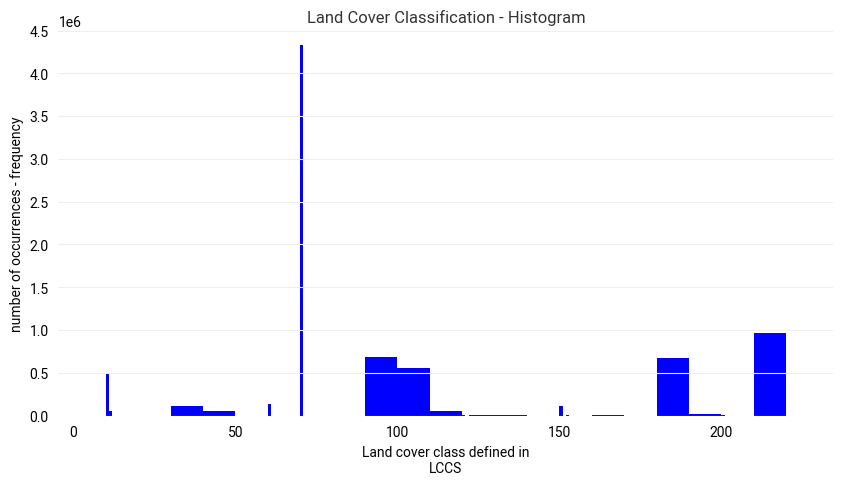

In [21]:
# Create & plot a histogram
classes = np.array([0, 10, 11, 12, 20, 30, 40, 50, 60, 61, 62, 70, 71, 72, 80,
        81, 82, 90, 100, 110, 120, 121, 122, 130, 140, 150, 151,
        152, 153, 160, 170, 180, 190, 200, 201, 202, 210, 220, 230])
min_edge = classes - 0.2
max_edge= classes + 0.2
range_lc = (-5, 235)
data_lccs_region_1D=data_lccs_masked.stack(z=('lat', 'lon')).reset_index('z')
data_lccs_region_1D_series = data_lccs_region_1D.to_series()
data_lccs_region_1D_series_len_without_nan = data_lccs_region_1D_series.size-np.isnan(data_lccs_region_1D_series).sum()
data_lccs_region_1D_series.dropna(inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
xr.plot.hist(
    data_lccs_region_1D, range=range_lc, bins=classes,
    ax=ax, histtype='bar', color='blue'
)
ax.set_title("Land Cover Classification - Histogram")
ax.set_ylabel("number of occurrences - frequency")
ax.set_ylim([0, 4.5E6])
plt.show()

**Figure 8-2: Histogram of Land Cover Map 2022 over the classes for Finland**

C:\Users\Grit\AppData\Local\Temp\ipykernel_42708\2874491963.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  area_per_class_a = N_norm * float(area_polygon[0])
C:\Users\Grit\AppData\Local\Temp\ipykernel_42708\2874491963.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  area_per_class_b = N * float(area_per_pixel[0])


,LCCS,class_labels,numbers,numbers_norm,percent,percent_2_nd_version,area_per_class,area_per_class_2nd_version
0,0,0 - No Data,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,10,"10 - Cropland, rainfed",492537,0.059437,5.943738,5.943738,3.795098,3.795098
2,11,"11 - Cropland, rainfed, herbaceous cover",56794,0.006854,0.685367,0.685367,0.437609,0.437609
3,12,"12 - Cropland, rainfed, tree, or shrub cover",0,0.000000,0.000000,0.000000,0.000000,0.000000
4,20,"20 - Cropland, irrigated or post-flooding",0,0.000000,0.000000,0.000000,0.000000,0.000000
5,30,30 - Mosaic cropland (>50%) / natural vegetat...,105869,0.001278,0.127758,1.277584,0.081574,0.815742
6,40,"40 - Mosaic natural vegetation (tree, shrub, ...",56001,0.000676,0.067580,0.675797,0.043150,0.431499
7,50,"50 - Tree cover, broadleaved, evergreen, clos...",0,0.000000,0.000000,0.000000,0.000000,0.000000
8,60,"60 - Tree cover, broadleaved, deciduous, clos...",136647,0.016490,1.649001,1.649001,1.052893,1.052893
9,61,"61 - Tree cover, broadleaved, deciduous, clos...",0,0.000000,0.000000,0.000000,0.000000,0.000000


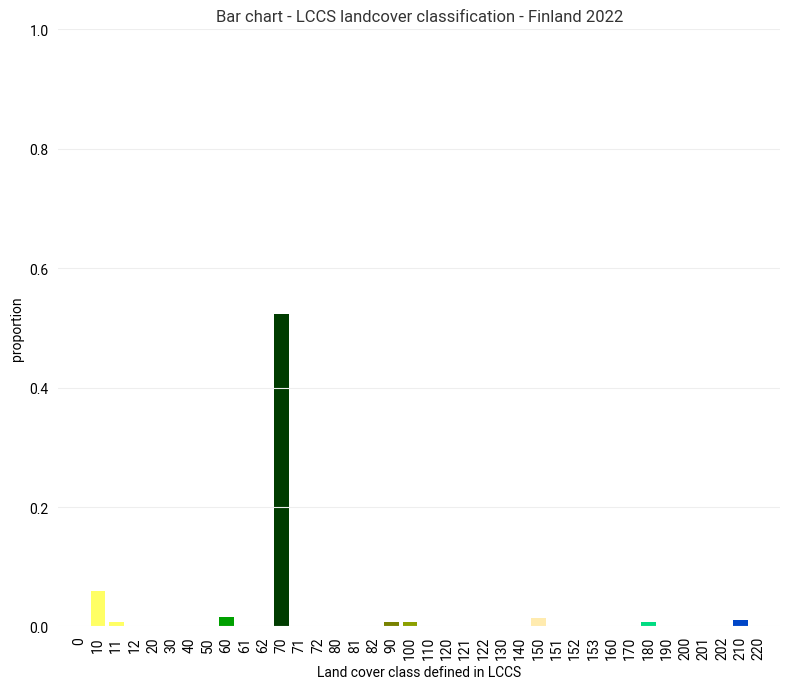

In [22]:
# N is the count in each bin, bins is the lower-limit of the bin
N, bins = np.histogram(data_lccs_region_1D_series, bins=classes)
N_norm, bins_norm = np.histogram(data_lccs_region_1D_series, bins=classes, density=True)

# Calulate area per pixel
area_per_pixel= area_polygon/len(data_lccs_region_1D_series)
area_per_class_a = N_norm * float(area_polygon[0])
area_per_class_b = N * float(area_per_pixel[0])

class_labels = ["  0 - No Data",
" 10 - Cropland, rainfed",
" 11 - Cropland, rainfed, herbaceous cover",
" 12 - Cropland, rainfed, tree, or shrub cover",
" 20 - Cropland, irrigated or post-flooding",
" 30 - Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)",
" 40 - Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)",
" 50 - Tree cover, broadleaved, evergreen, closed to open (>15%)",
" 60 - Tree cover, broadleaved, deciduous, closed to open (>15%)",
" 61 - Tree cover, broadleaved, deciduous, closed (>40%)",
" 62 - Tree cover, broadleaved, deciduous, open (15-40%)",
" 70 - Tree cover, needleleaved, evergreen, closed to open (>15%)",
" 71 - Tree cover, needleleaved, evergreen, closed (>40%)",
" 72 - Tree cover, needleleaved, evergreen, open (15-40%)",
" 80 - Tree cover, needleleaved, deciduous, closed to open (>15%)",
" 81 - Tree cover, needleleaved, deciduous, closed (>40%)",
" 82 - Tree cover, needleleaved, deciduous, open (15-40%)",
" 90 - Tree cover, mixed leaf type (broadleaved and needleleaved)",
"100 - Mosaic tree and shrub (>50%) / herbaceous cover (<50%)",
"110 - Mosaic herbaceous cover (>50%) / tree and shrub (<50%)",
"120 - Shrubland",
"121 - Evergreen shrubland",
"122 - Deciduous shrubland",
"130 - Grassland",
"140 - Lichens and mosses",
"150 - Sparse vegetation (tree, shrub, herbaceous cover) (<15%)",
"151 - Sparse tree (<15%)",
"152 - Sparse shrub (<15%)",
"153 - Sparse herbaceous cover (<15%)",
"160 - Tree cover, flooded, fresh, or brackish water",
"170 - Tree cover, flooded, saline water",
"180 - Shrub or herbaceous cover, flooded, fresh/saline/brackish water",
"190 - Urban areas",
"200 - Bare areas",
"201 - Consolidated bare areas",
"202 - Unconsolidated bare areas",
"210 - Water bodies",
"220 - Permanent snow and ice"]


colors = ((0, 0, 0),                 # 0
         (1, 1, 0.392156),           # 10
         (1, 1, 0.392156),           # 11
         (1, 1, 0),                  # 12
         (0.666666, 0.941176, 0.941176),    # 20
         (0.862745, 0.941176, 0.392156),    # 30
         (0.784313, 0.784313, 0.392156),    # 40
         (0, 0.392156, 0),           # 50
         (0, 0.62745, 0),            # 60
         (0, 0.62745, 0),            # 61
         (0.666666, 0.784313, 0),    # 62
         (0, 0.235294, 0),           # 70
         (0, 0.235294, 0),           # 71
         (0, 0.313725, 0),           # 72
         (0.156862, 0.313725, 0),    # 80
         (0.156862, 0.313725, 0),    # 81
         (0.156862, 0.392156, 0),    # 82
         (0.470588, 0.509803, 0),    # 90
         (0.549019, 0.62745, 0),     # 100
         (0.745098, 0.588235, 0),    # 110
         (0.588235, 0.392156, 0),    # 120
         (0.588235, 0.392156, 0),    # 121
         (0.588235, 0.392156, 0),    # 122
         (1, 0.705882, 0.196078),    # 130
         (1, 0.862745, 0.823529),    # 140
         (1, 0.921568, 0.686274),    # 150
         (1, 0.784313, 0.392156),    # 151
         (1, 0.823529, 0.470588),    # 152
         (1, 0.921568, 0.686274),    # 153
         (0, 0.470588, 0.352941),    # 160
         (0, 0.588235, 0.470588),    # 170
         (0, 0.862745, 0.509803),    # 180
         (0.764705, 0.078431, 0),    # 190
         (1, 0.960784, 0.843137),    # 200
         (0.862745, 0.862745, 0.862745),    # 201
         (1, 0.960784, 0.843137),    # 202
         (0, 0.274509, 0.784313),   # 210
         (1, 1, 1)    # 220
         )

df_area = pd.DataFrame(classes[0:len(classes)-1], columns=['LCCS'])
df_area["class_labels"] = class_labels
df_area["numbers"] = N
df_area["numbers_norm"] = N_norm
df_area["percent"] = N_norm * 100.
df_area["percent_2_nd_version"] = N/np.sum(N) * 100.
df_area["area_per_class"]=area_per_class_a
df_area["area_per_class_2nd_version"]=area_per_class_b

display(df_area)

#save statistics
file_name_statistics= os.path.join(LOCAL_DATA_DIR, f"lc_2022_{country}.csv")
df_area.to_csv(file_name_statistics, sep=';', index=False)

# Set plot title
time_str= str(data_lccs_masked.coords['time'].values[0]).split('-')[0]
title = f'Bar chart - LCCS landcover classification - {country.title()} {time_str}'

# Create the figures
fig, ax = plt.subplots(1, 1, tight_layout=True)

ax.bar(np.char.mod('%d', df_area['LCCS'].values), df_area["numbers_norm"].values,  color=colors)
# Now we format the y-axis to display percentage
# ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.set_title(title)
ax.tick_params(axis='x', labelrotation=90)
# ax.legend(title='LCCS', loc='upper center', ncol=2)
ax.set_ylim([0, 1])
ax.set_xlabel("Land cover class defined in LCCS")
ax.set_ylabel("proportion")
plt.show()


**Figure 8-3: Normalized histogram of Land Cover Map 2022 over the classes for Finland**

## 9. Conclusion
This tutorial demonstrated how C3S & CCI Land Cover products available through the C3S can be explored. By working on a spatial statistics of the LCCS classes we produced information on Finland's Land Cover. We have downloaded, visualised, subset, and analysed the data, to produce meaningful and informative visuals and tables. In addition, we derived and visualised an additional aspect - land cover change - from the data.